## Module-1: Data Collection

In [7]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

file_path = "FWI Dataset.csv"   
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
region_mapping = {
    0 : 'Bejaia',
    1 : 'Sidi-Bel Abbes'
}

df['Region'] = df['Region'].map(region_mapping)

random_rows = df.sample(n=5)
print("Random rows: \n", random_rows)

Random rows: 
       day  month    year  Temperature    RH    Ws  Rain  FFMC   DMC     DC  \
58   29.0    7.0  2012.0         32.0  73.0  15.0   0.0  86.6  26.7    127   
52   23.0    7.0  2012.0         27.0  66.0  22.0   0.4  68.2  10.5   71.3   
187   2.0    8.0  2012.0         40.0  34.0  14.0   0.0  93.3  10.8   21.4   
83   23.0    8.0  2012.0         36.0  53.0  16.0   0.0  89.5  37.6  161.5   
89   29.0    8.0  2012.0         35.0  48.0  18.0   0.0  90.1  54.2  220.4   

      ISI   BUI   FWI      Classes          Region  
58    5.6  35.0  11.9      fire             Bejaia  
52    1.8  15.4   2.1  not fire             Bejaia  
187  13.8  10.6  13.5      fire     Sidi-Bel Abbes  
83   10.4  47.5  22.3         fire          Bejaia  
89   12.5  67.4  30.2      fire             Bejaia  


In [8]:
print(df[df.isnull().any(axis=1)])

df["DC"] = pd.to_numeric(df["DC"], errors="coerce")
df["FWI"] = pd.to_numeric(df["FWI"], errors="coerce")


# print(df.isnull().sum())
df.info()

      day  month    year  Temperature    RH    Ws  Rain  FFMC   DMC      DC  \
122   NaN    NaN     NaN          NaN   NaN   NaN   NaN   NaN   NaN     NaN   
123   NaN    NaN     NaN          NaN   NaN   NaN   NaN   NaN   NaN     NaN   
124   NaN    NaN     NaN          NaN   NaN   NaN   NaN   NaN   NaN     NaN   
168  14.0    7.0  2012.0         37.0  37.0  18.0   0.2  88.9  12.9  14.6 9   

      ISI   BUI      FWI Classes          Region  
122   NaN   NaN      NaN     NaN             NaN  
123   NaN   NaN      NaN     NaN             NaN  
124   NaN   NaN      NaN     NaN             NaN  
168  12.5  10.4  fire        NaN  Sidi-Bel Abbes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    

In [9]:
# to drop row
# df = df.dropna(how='any')
# df.dropna(inplace=True)
# df.info()

#to drop col
# df.dropna(axis=1,inplace=True)
# df.info()

# filling values using mode -- most frequent
# df['Classes'].fillna(df['Classes'].mode()[0], inplace=True)

# forward filling
df['Classes'].fillna(method='ffill', inplace=True)

# filling missing numeric values with column mean
df['DC'].fillna(df['DC'].mean(), inplace=True)
df['FWI'].fillna(df['FWI'].mean(), inplace=True)

print(df.isnull().sum())
df.info()


day            3
month          3
year           3
Temperature    3
RH             3
Ws             3
Rain           3
FFMC           3
DMC            3
DC             0
ISI            3
BUI            3
FWI            0
Classes        0
Region         3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           247 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          247 non-null    float

## Module-2: Data Exploration and Data Preprocessing
### Boxplot

*****Box shows median, quartiles, and spread.Dots represent outliers in data.******


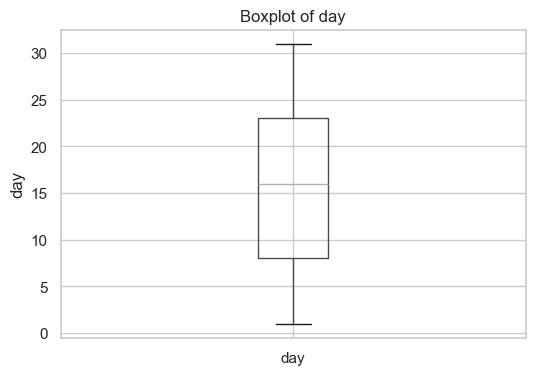

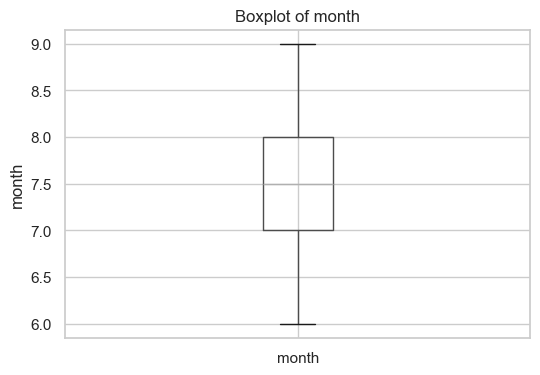

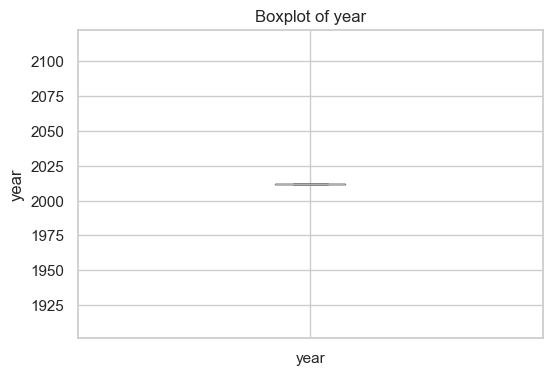

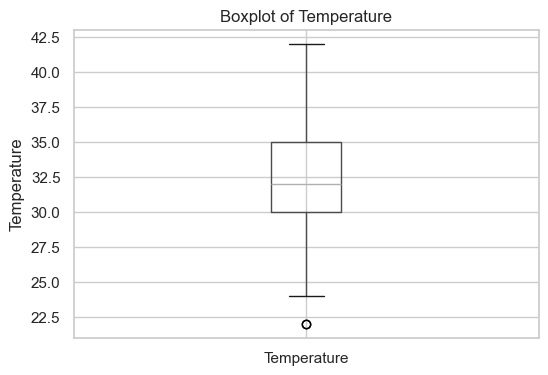

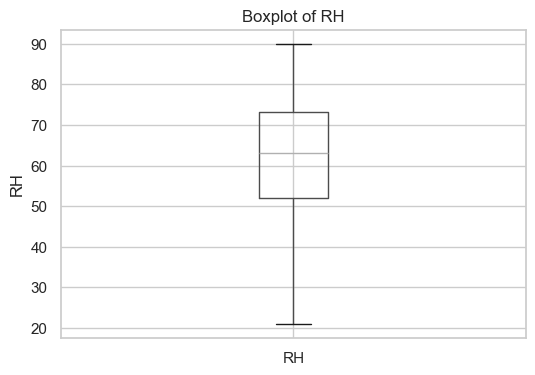

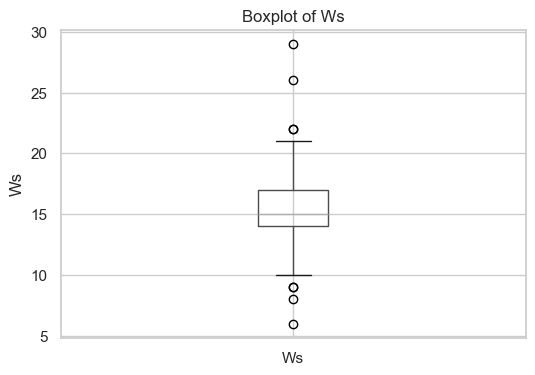

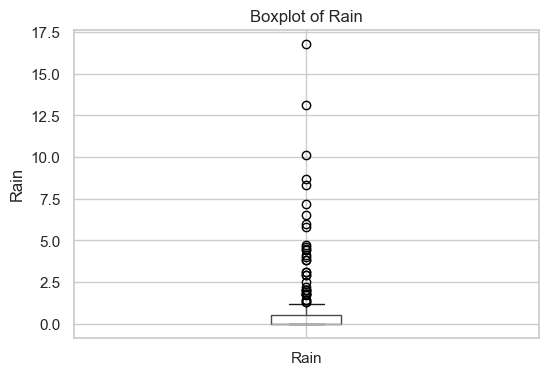

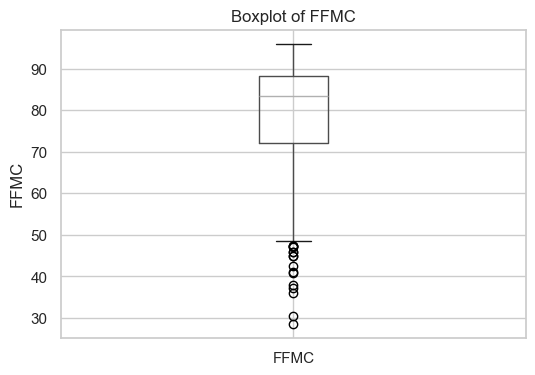

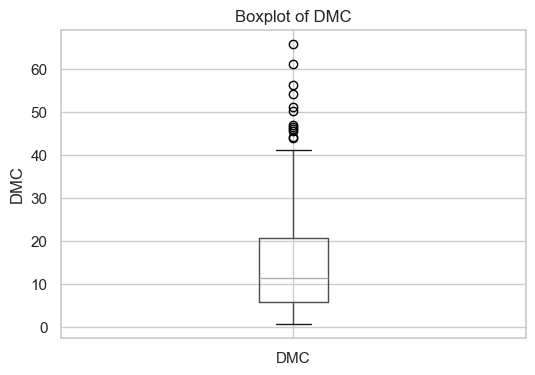

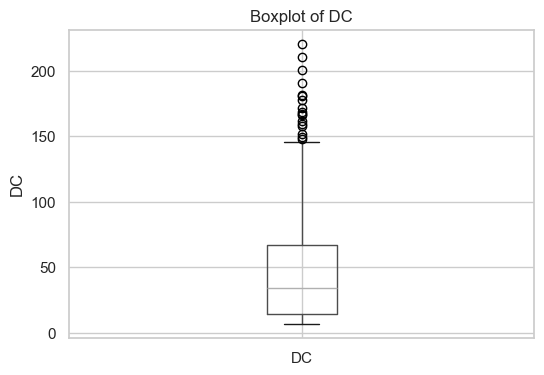

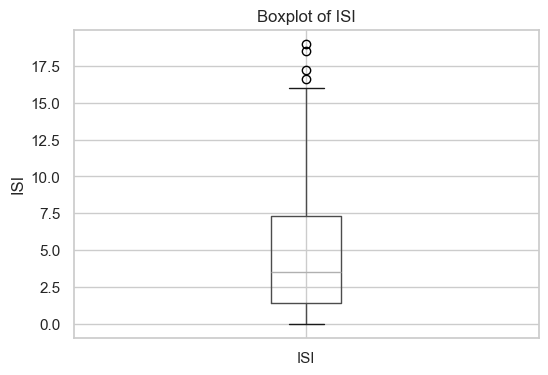

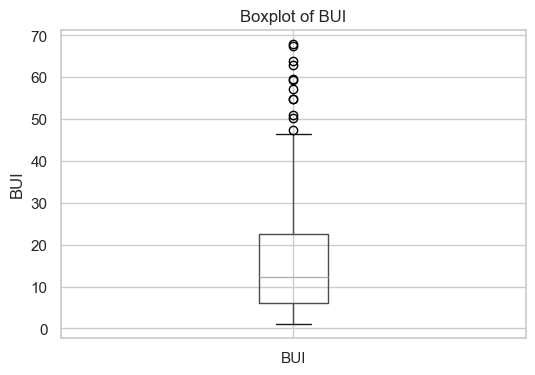

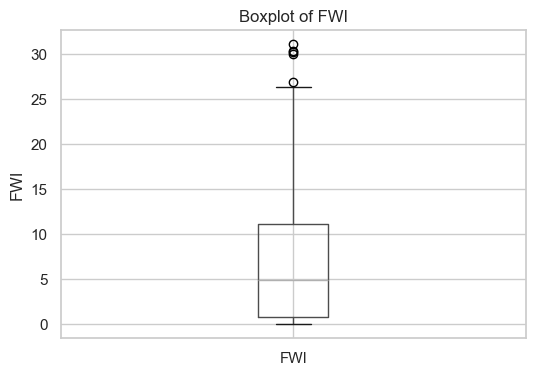

*****Box shows median, quartiles, and spread.Dots represent outliers in data.******


In [10]:
import matplotlib.pyplot as plt

# Removing classes as classes has categorial data
# df.drop(columns=['Classes'], inplace=True)

# to select only attributes which contain numerial values
num_cols = df.select_dtypes(include='number').columns 

print("*****Box shows median, quartiles, and spread.Dots represent outliers in data.******")

# Generate boxplots for each numerical column with title
for col in num_cols:
    plt.figure(figsize=(6,4))
    df.boxplot(column=[col])
    plt.title(f"Boxplot of {col}")   
    plt.ylabel(col)
    plt.show()


print("*****Box shows median, quartiles, and spread.Dots represent outliers in data.******")


In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_counts = {}

print("here is the outlier(s) in each feature")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outlier_counts[col] = outliers.shape[0]

outlier_counts


here is the outlier(s) in each feature


{'day': 0,
 'month': 0,
 'year': 0,
 'Temperature': 2,
 'RH': 0,
 'Ws': 8,
 'Rain': 35,
 'FFMC': 16,
 'DMC': 12,
 'DC': 17,
 'ISI': 4,
 'BUI': 12,
 'FWI': 5}

## Histogram

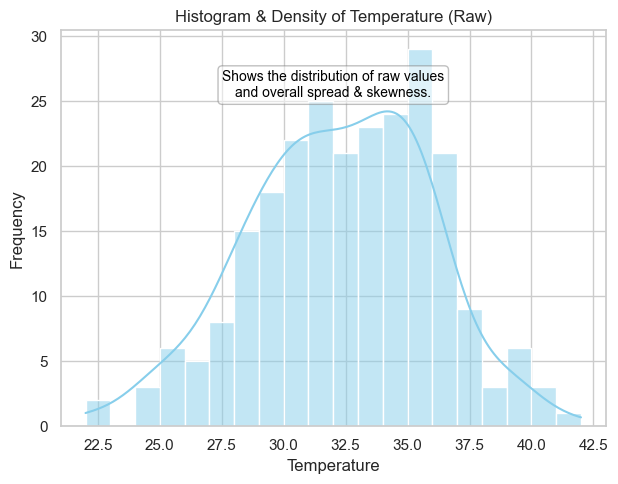

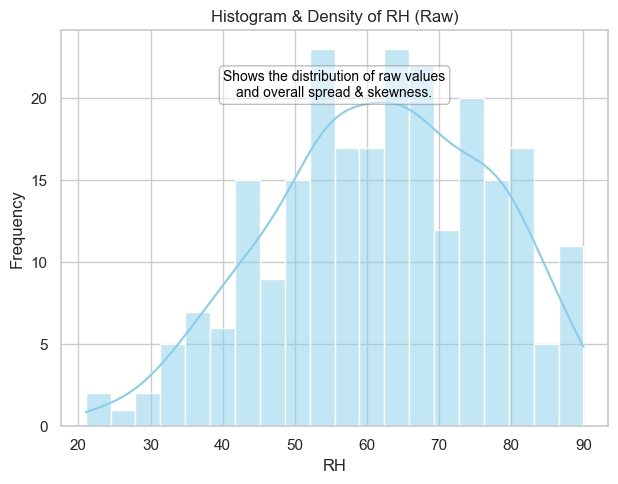

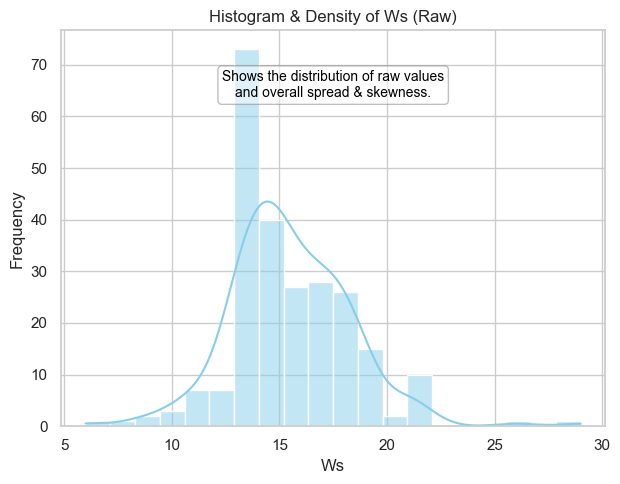

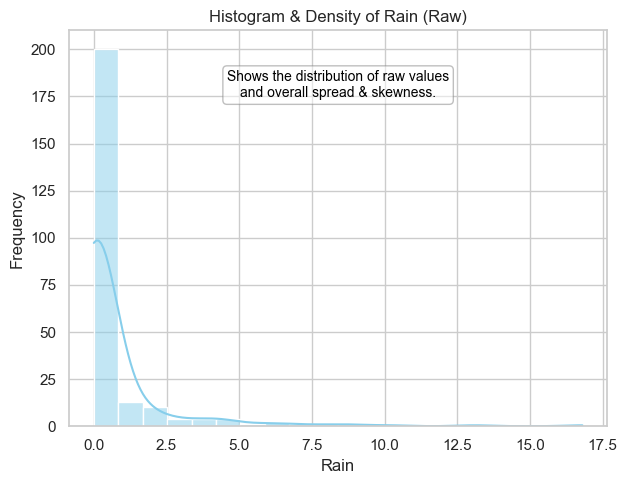

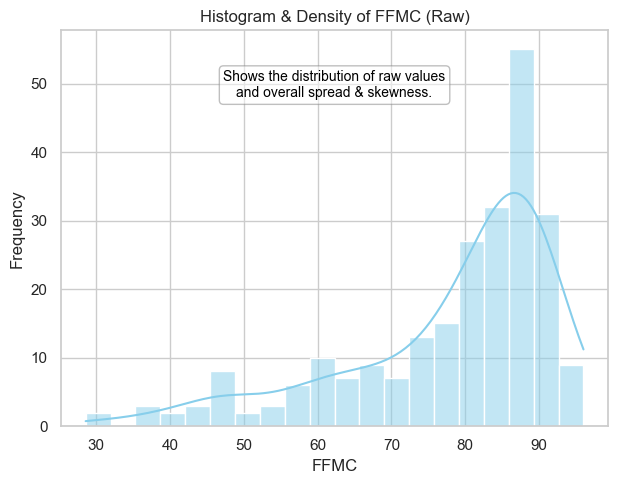

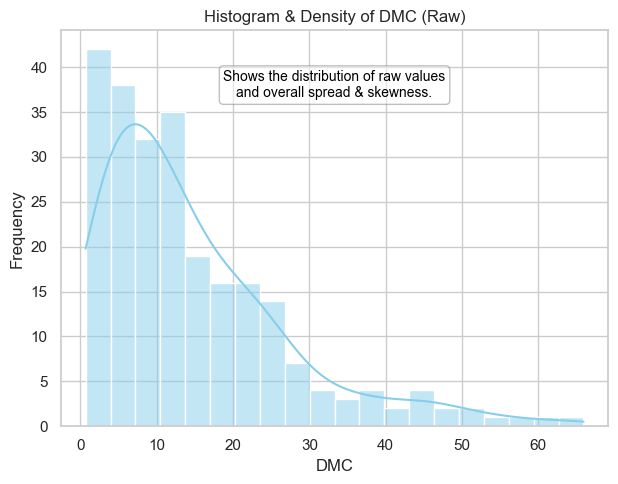

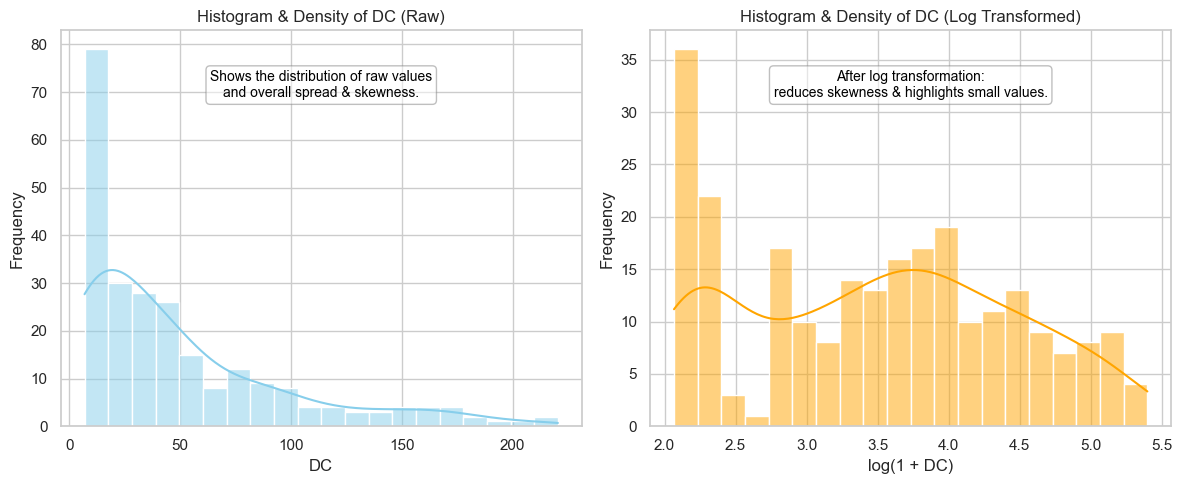

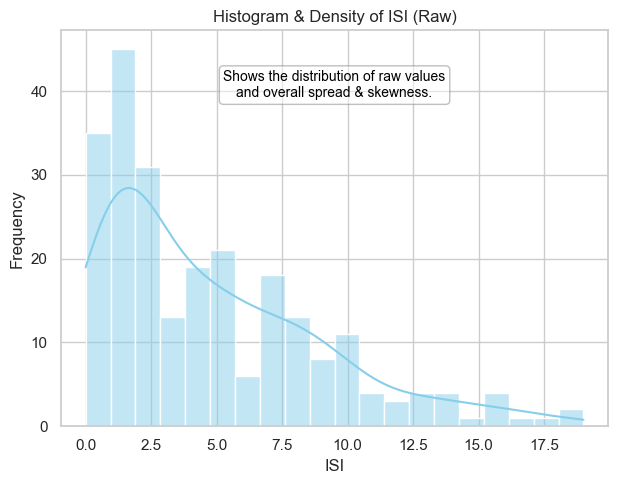

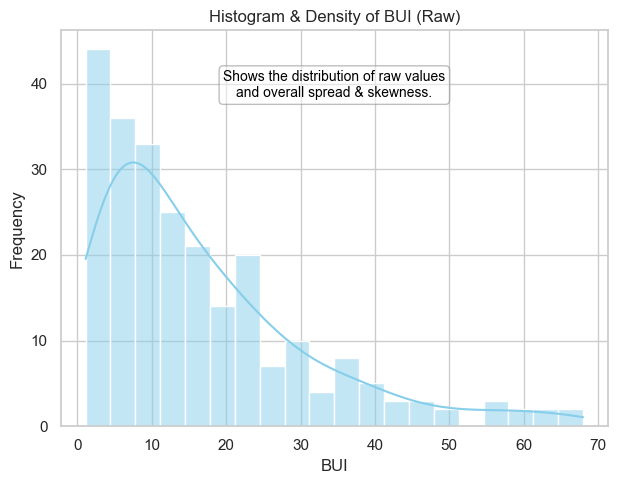

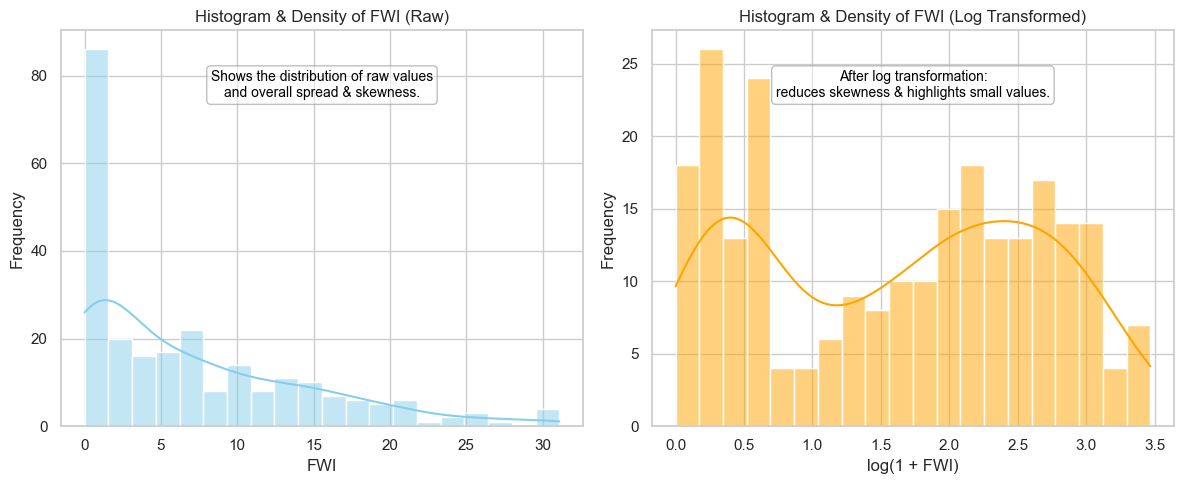

In [12]:
import seaborn as sns
import numpy as np


# continuous numerical columns are here
cont_cols = ['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']

sns.set(style="whitegrid")

for col in cont_cols:
    data = df[col]

    plt.figure(figsize=(12,5))

    # histogram + KDE (raw data)
    plt.subplot(1,2,1)
    sns.histplot(data, bins=20, kde=True, color="skyblue")
    plt.title(f"Histogram & Density of {col} (Raw)")
    plt.xlabel(col)
    plt.ylabel("Frequency")


    # description text added here
    plt.text(
        0.5, 0.9,
        "Shows the distribution of raw values\nand overall spread & skewness.",
        transform=plt.gca().transAxes,
        ha="center", va="top", fontsize=10, color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.5)
    )

    # log transformation(if all values >= 0)
    if (data >= 0).all():
        plt.subplot(1,2,2)
        sns.histplot(np.log1p(data), bins=20, kde=True, color="orange")
        plt.title(f"Histogram & Density of {col} (Log Transformed)")
        plt.xlabel(f"log(1 + {col})")
        plt.ylabel("Frequency")

        # description text added here
        plt.text(
            0.5, 0.9,
            "After log transformation:\nreduces skewness & highlights small values.",
            transform=plt.gca().transAxes,
            ha="center", va="top", fontsize=10, color="black",
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.5)
        )
    
    plt.tight_layout()
    plt.show()


## Denisty Plot

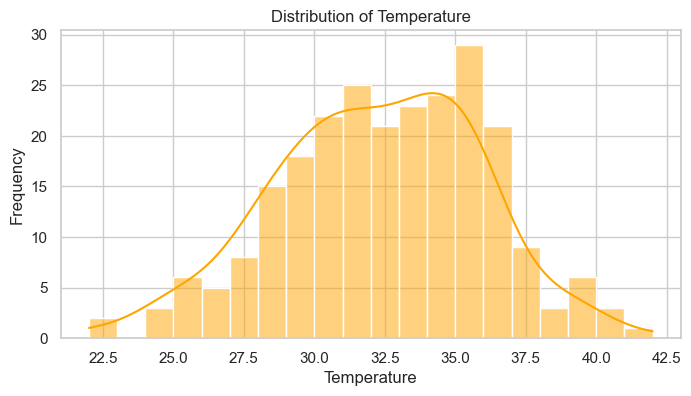

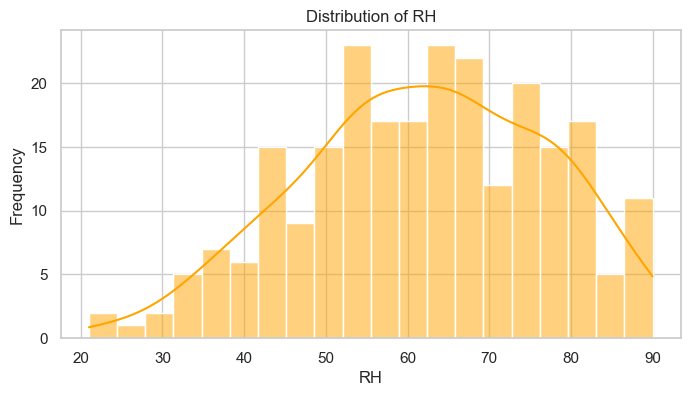

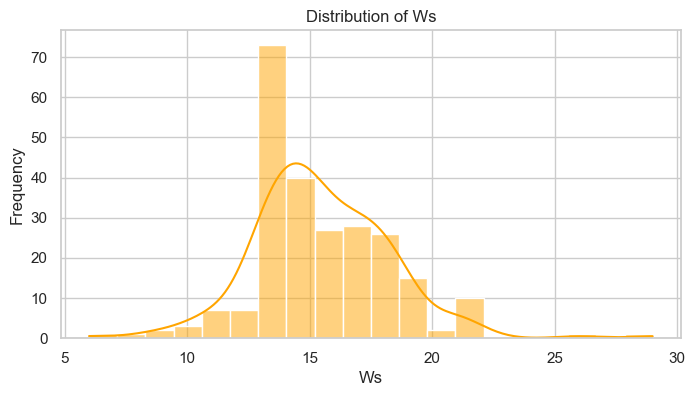

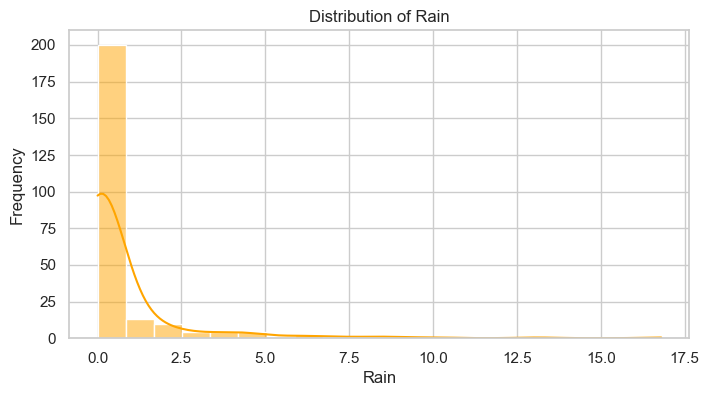

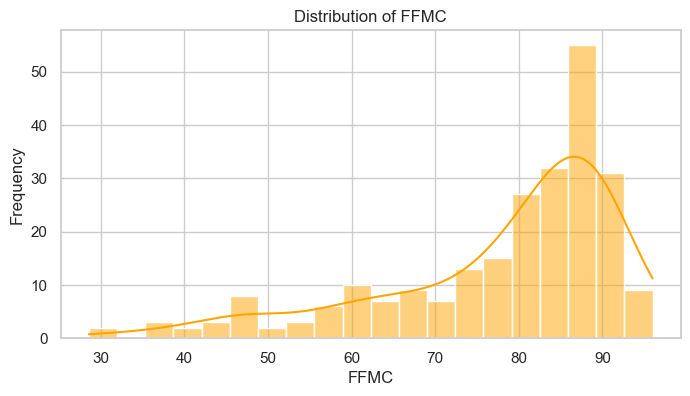

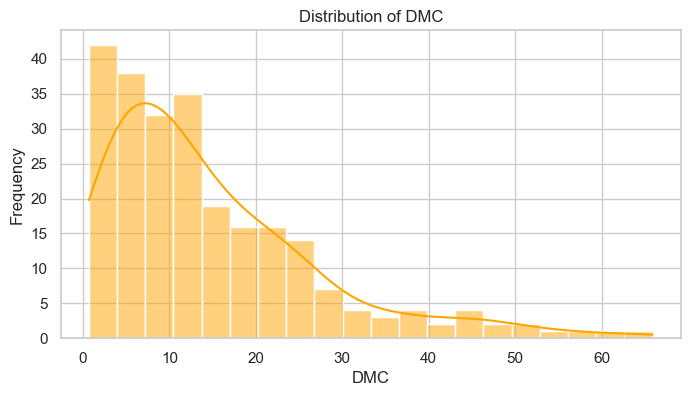

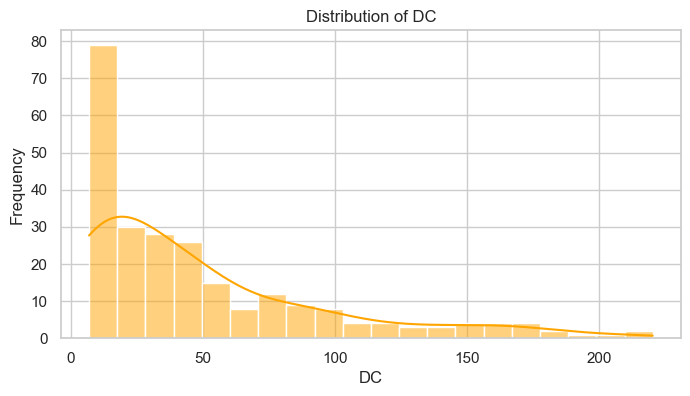

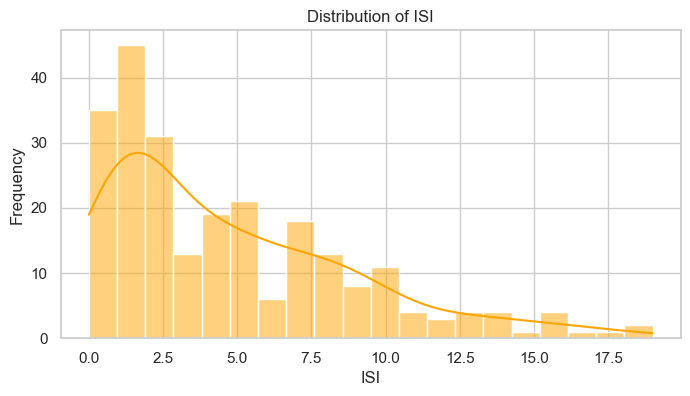

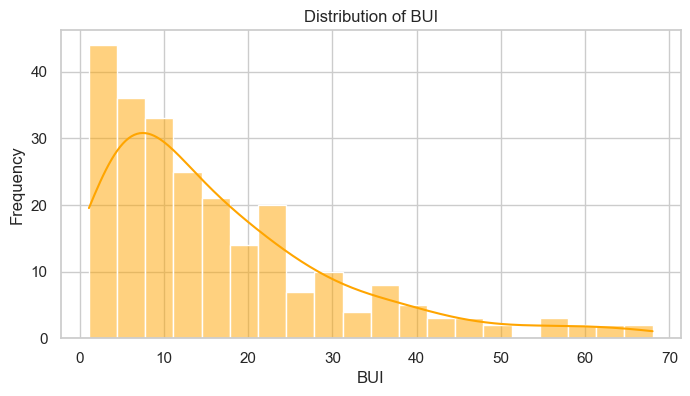

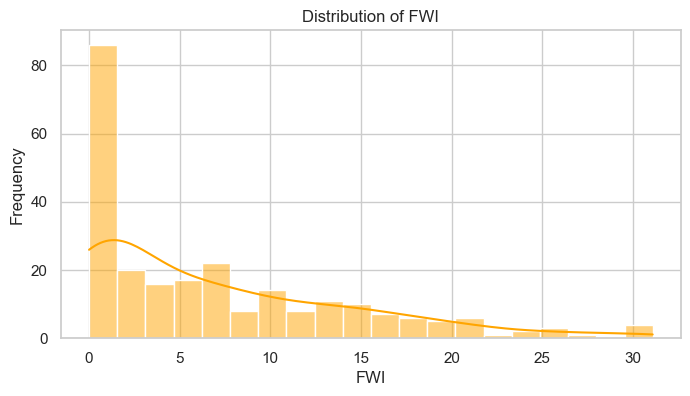

In [13]:
sns.set(style="whitegrid")

key_cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

for col in key_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20, color='orange')  # histogram + density
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Explored feature relationships using correlation matrix and scatterplots.

## HeatMap

Correlation Matrix — It shows how strongly each numerical feature in your dataset relates to every other feature.

• Red cells represent a strong positive correlation (as one variable increases, the other increases).
• Blue cells represent a strong negative correlation (as one variable increases, the other decreases).
• White or light shades indicate weak or no correlation between variables.



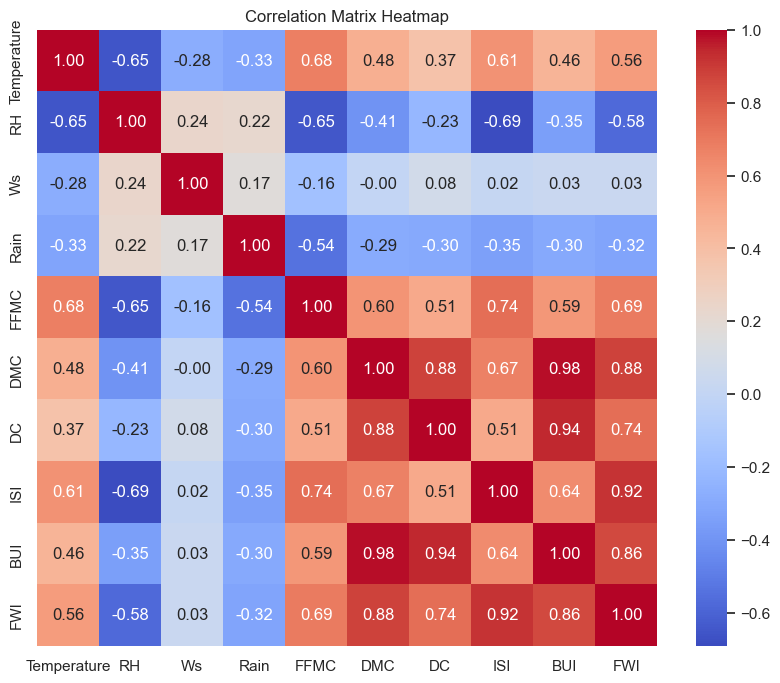

In the above heatmap:
FWI is strongly correlated with DMC, DC, and BUI,
while RH (humidity) shows a negative correlation with Temperature, FFMC, ISI and FWI.


In [14]:
# compute correlation for numerical columns
corr = df[cont_cols].corr()

print("Correlation Matrix — It shows how strongly each numerical feature in your dataset relates to every other feature.\n")
print("• Red cells represent a strong positive correlation (as one variable increases, the other increases).")
print("• Blue cells represent a strong negative correlation (as one variable increases, the other decreases).")
print("• White or light shades indicate weak or no correlation between variables.\n")

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

print("In the above heatmap:")

print("FWI is strongly correlated with DMC, DC, and BUI,")
print("while RH (humidity) shows a negative correlation with Temperature, FFMC, ISI and FWI.")


## Scatter plot

The scatter plot shows how fire risk (FWI) changes with temperature across different regions, 
helping us identify whether higher temperatures lead to higher fire danger and how this trend varies by region.


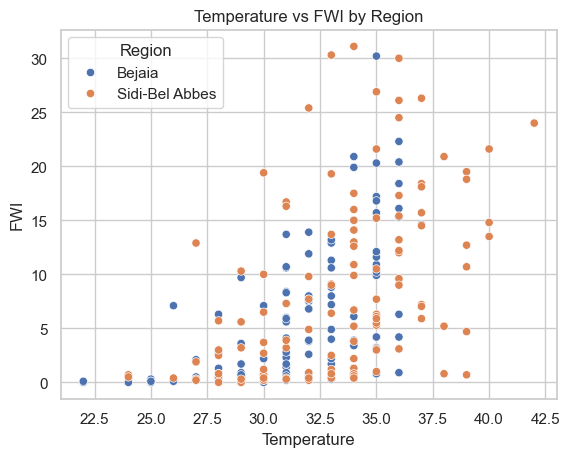

In [15]:
print("The scatter plot shows how fire risk (FWI) changes with temperature across different regions, \nhelping us identify whether higher temperatures lead to higher fire danger and how this trend varies by region.")
sns.scatterplot(x="Temperature", y="FWI", data=df, hue="Region")
plt.title("Temperature vs FWI by Region")
plt.show()


## Pair Plot (scatterplot matrix)

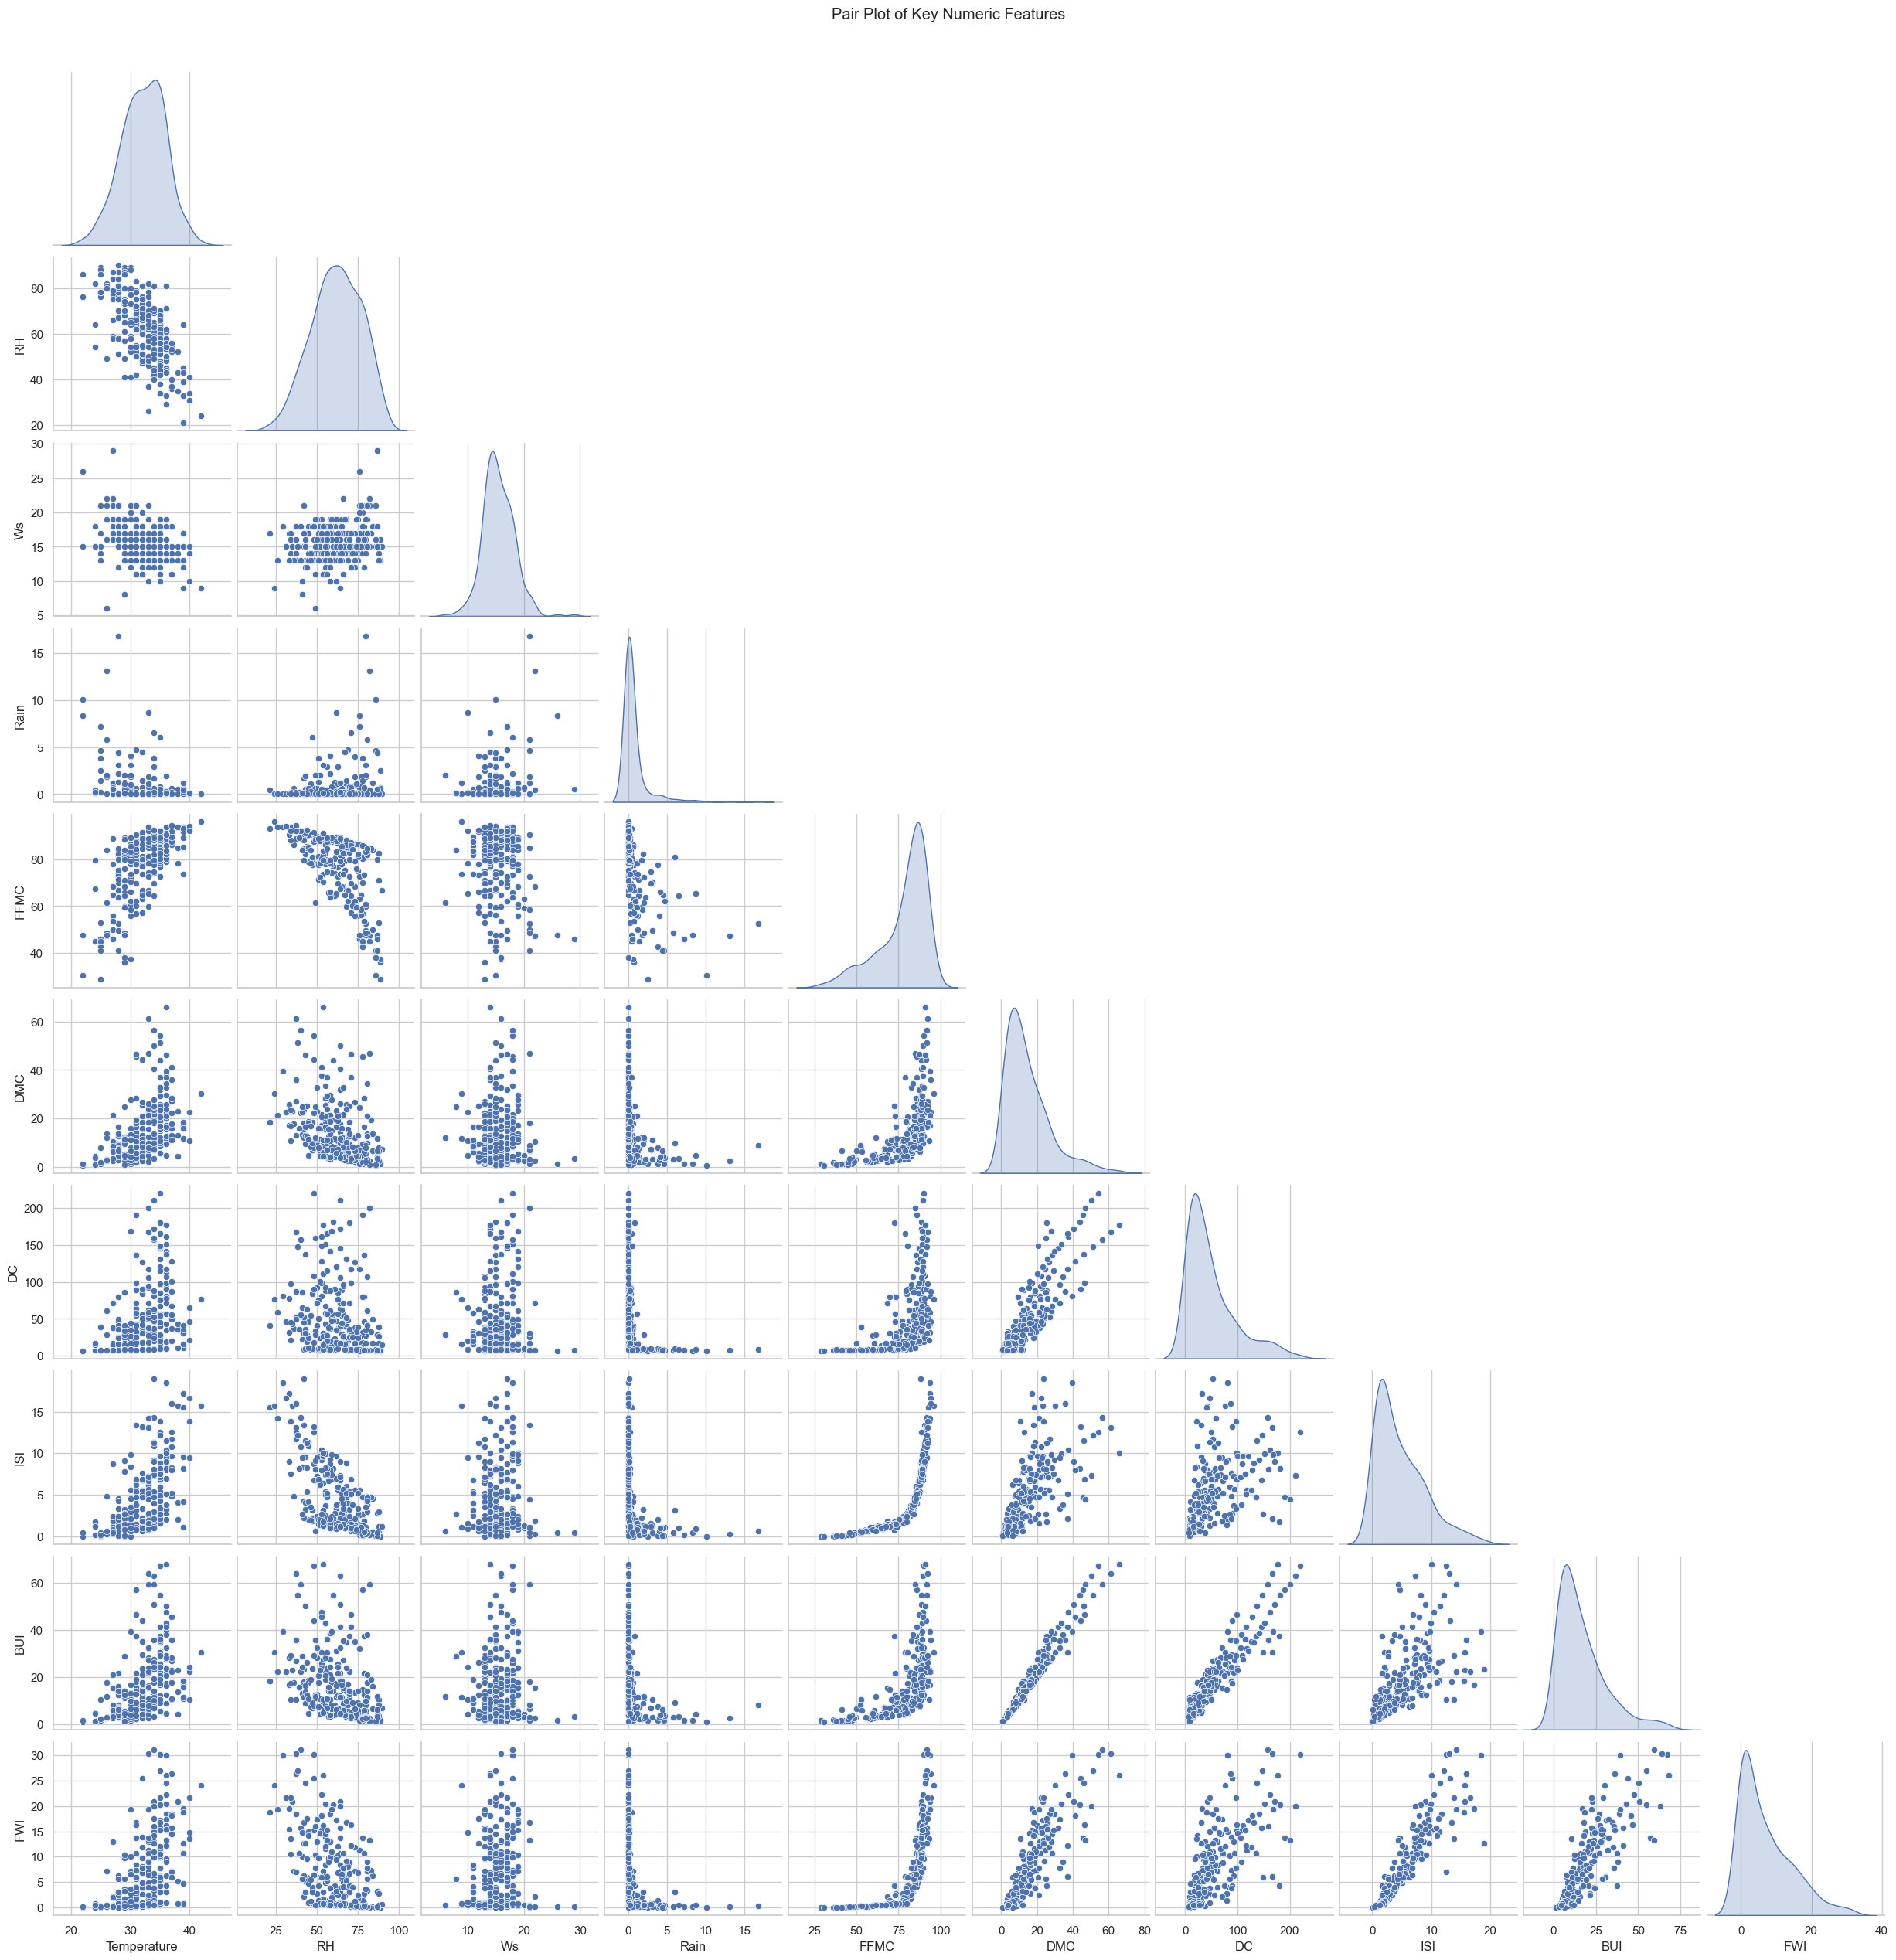


From the graph we can observe:
1️ Temperature and RH show a negative relationship — when temperature increases, RH decreases.
2️ FWI increases as Temperature, DMC, DC, and BUI increase (positive relation).
3️ Rain doesn’t show a strong relation with other features — more rain usually means less fire risk.
4️ Wind speed (Ws) has weaker relation with most features.



In [16]:
key_cols = ['Temperature', 'RH', 'Ws','Rain' ,'FFMC','DMC','DC','ISI','BUI','FWI']
sns.pairplot(df[key_cols], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Key Numeric Features", y=1.02)
plt.show()



print("""
From the graph we can observe:
1️ Temperature and RH show a negative relationship — when temperature increases, RH decreases.
2️ FWI increases as Temperature, DMC, DC, and BUI increase (positive relation).
3️ Rain doesn’t show a strong relation with other features — more rain usually means less fire risk.
4️ Wind speed (Ws) has weaker relation with most features.
""")


In [17]:


import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot Example
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['DC','FWI','BUI']])
plt.title("Boxplots of numerical features")
plt.savefig("boxplots_outliers.png", dpi=300, bbox_inches='tight')
plt.close()  

# Histogram Example
plt.figure(figsize=(10,6))
df['FWI'].hist(bins=20)
plt.title("Histogram of FWI")
plt.savefig("histograms_density.png", dpi=300, bbox_inches='tight')
plt.close()

numeric_df = df.select_dtypes(include='number')
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.close()

# Scatter Plot Example
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='FWI', hue='Region', data=df)
plt.title("Temperature vs FWI by Region")
plt.savefig("scatter_temp_fwi.png", dpi=300, bbox_inches='tight')
plt.close()

# Pair Plot Example
pair_plot = sns.pairplot(df[['Temperature','RH','DMC','DC','BUI','FWI']])
pair_plot.savefig("pairplot_key_features.png", dpi=300, bbox_inches='tight')
plt.close()


## Label Encoding


In [18]:
df['Classes'] = df['Classes'].str.strip().str.lower()
df['Region'] = df['Region'].str.strip().str.lower()

from sklearn.preprocessing import LabelEncoder

le_region = LabelEncoder()
le_classes = LabelEncoder()

df['Region_encoded'] = le_region.fit_transform(df['Region'])
df['Classes_encoded'] = le_classes.fit_transform(df['Classes'])

print(df[['Region', 'Region_encoded', 'Classes', 'Classes_encoded']].head())


   Region  Region_encoded   Classes  Classes_encoded
0  bejaia               0  not fire                1
1  bejaia               0  not fire                1
2  bejaia               0  not fire                1
3  bejaia               0  not fire                1
4  bejaia               0  not fire                1


In [19]:
## saving cleaned dataset
df.to_csv("FWI_Dataset_Cleaned.csv", index=False)


## Module-3; Feature Engineering and Scaling
### Selected key input features

In [20]:
corr_matrix = df.corr(numeric_only=True)

print(corr_matrix['FWI'].sort_values(ascending=False))

selected_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']
target = 'FWI'

X = df[selected_features]
y = df[target]


FWI                1.000000
ISI                0.916343
DMC                0.875827
BUI                0.857628
DC                 0.739521
FFMC               0.690289
Temperature        0.564599
day                0.350752
Region_encoded     0.186754
month              0.082604
Ws                 0.032315
Rain              -0.324369
RH                -0.577577
Classes_encoded   -0.712468
year                    NaN
Name: FWI, dtype: float64


### Normalize numerical features using StandardScaler


In [21]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)
print(X_scaled_df.describe())

# X_scaled

        Temperature            RH            Ws          Rain          FFMC  \
count  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02   
mean   8.444975e-16 -1.747236e-16  1.892839e-16  1.456030e-17  3.494472e-16   
std    1.002056e+00  1.002056e+00  1.002056e+00  1.002056e+00  1.002056e+00   
min   -2.805030e+00 -2.756122e+00 -3.388978e+00 -3.812229e-01 -3.444727e+00   
25%   -5.989790e-01 -6.690956e-01 -5.363325e-01 -3.812229e-01 -4.062510e-01   
50%   -4.746626e-02  7.146217e-02 -1.797518e-01 -3.812229e-01  3.922443e-01   
75%    7.798029e-01  7.615274e-01  5.334097e-01 -1.306346e-01  7.277172e-01   
max    2.710098e+00  1.889195e+00  4.812379e+00  8.038546e+00  1.265872e+00   

                DMC            DC           ISI           BUI  
count  2.440000e+02  2.470000e+02  2.440000e+02  2.440000e+02  
mean  -2.766457e-16  7.910901e-17 -1.892839e-16 -8.736181e-17  
std    1.002056e+00  1.002030e+00  1.002056e+00  1.002056e+00  
min   -1.132118e+00 -9.014463e-0

### Split dataset into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (197, 9)
Testing data shape: (50, 9)


In [23]:
import pickle

# saving the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler saved successfully as scaler.pkl!")


Scaler saved successfully as scaler.pkl!


In [24]:
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)


## Module-4: Training Model

### Linear Regression

In [25]:
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # assuming X_train, X_test, y_train are already defined
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)

# # train Linear Regression
# lr_model = LinearRegression()
# lr_model.fit(X_train_imputed, y_train)

# y_pred = lr_model.predict(X_test_imputed)


# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")


### Linear regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Linear Regression fits a straight line to the data, predicting the target as a linear combination of input features. \nIt works well when the relationship between features and target is approximately linear.")


# impute missing values and train model
X_train = SimpleImputer(strategy='mean').fit_transform(X_train)
X_test = SimpleImputer(strategy='mean').fit_transform(X_test)
y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}, R²: {r2_score(y_test, y_pred):.4f}")


Linear Regression fits a straight line to the data, predicting the target as a linear combination of input features. 
It works well when the relationship between features and target is approximately linear.
RMSE: 1.2225, R²: 0.9553


### Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pickle

print("Ridge Regression is a linear model that adds L2 regularization to reduce overfitting and handle multicollinearity between features.")


# impute missing values
X_train = SimpleImputer(strategy='mean').fit_transform(X_train)
X_test = SimpleImputer(strategy='mean').fit_transform(X_test)

# train Ridge Regression (handles multicollinearity)
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}, R²: {r2_score(y_test, y_pred):.4f}")

with open('ridge.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)


Ridge Regression is a linear model that adds L2 regularization to reduce overfitting and handle multicollinearity between features.
RMSE: 0.9520, R²: 0.9729


### Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

print("Lasso Regression is a linear model with L1 regularization. \nIt can shrink some coefficients to zero, performing feature selection automatically.")

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}, R²: {r2_score(y_test, y_pred):.4f}")


Lasso Regression is a linear model with L1 regularization. 
It can shrink some coefficients to zero, performing feature selection automatically.
RMSE: 1.0312, R²: 0.9682


### Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

print("Decision Tree splits data into regions based on feature values. \nIt can model non-linear relationships but may overfit without pruning.")

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}, R²: {r2_score(y_test, y_pred):.4f}")


Decision Tree splits data into regions based on feature values. 
It can model non-linear relationships but may overfit without pruning.
RMSE: 2.0698, R²: 0.8718


### Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

print("Random Forest builds multiple decision trees and averages their predictions. It reduces overfitting and captures complex patterns.")

rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}, R²: {r2_score(y_test, y_pred):.4f}")


Random Forest builds multiple decision trees and averages their predictions. It reduces overfitting and captures complex patterns.
RMSE: 1.0978, R²: 0.9639


## Module 5: Evaluation and Optimization


## Test data -- Prediction
### Evaluating the model using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) to penalize large errors , R2 Score to assess variance explanation

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions from the trained Ridge model
y_pred_ridge = ridge_cv.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_ridge)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


# R² Score
r2 = r2_score(y_test, y_pred_ridge)
print(f"R² Score: {r2:.4f}")



Mean Absolute Error (MAE): 0.6879
Root Mean Squared Error (RMSE): 0.9893
R² Score: 0.9707


### Getting best alpha through cross-validation

In [45]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas = np.logspace(-4, 4, 50) # a range of alphas to test

# RidgeCV automatically performs cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_results=True)
ridge_cv.fit(X_train, y_train)

print("Best alpha value:", ridge_cv.alpha_)


Best alpha value: 0.12648552168552957


### Plot of ridge regression with actual and predicted parameters

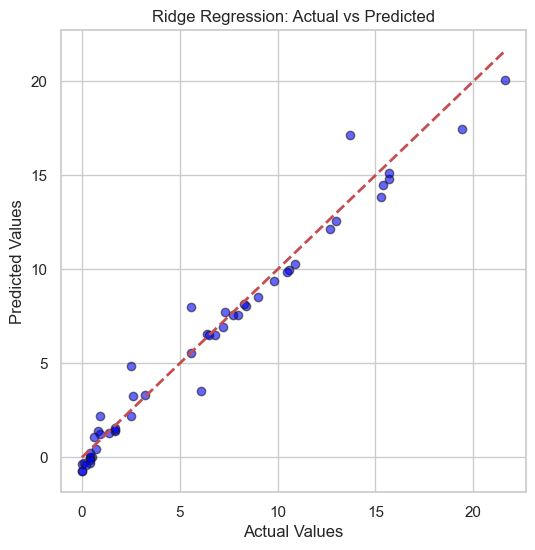

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


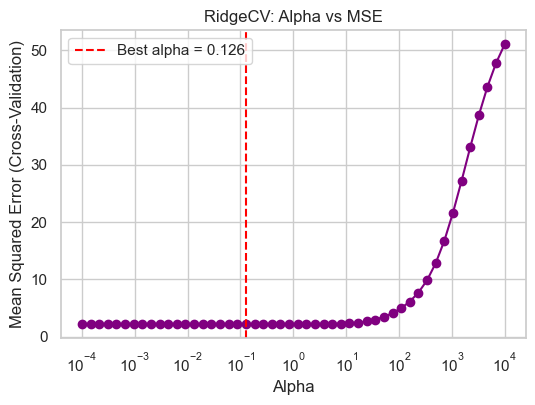

In [44]:
mean_mse = ridge_cv.cv_results_.mean(axis=0)

plt.figure(figsize=(6,4))
plt.semilogx(alphas, mean_mse, marker='o', color='purple')
plt.axvline(ridge_cv.alpha_, color='red', linestyle='--', label=f'Best alpha = {ridge_cv.alpha_:.3f}')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (Cross-Validation)')
plt.title('RidgeCV: Alpha vs MSE')
plt.legend()
plt.grid(True)
plt.show()
